<h1 style="margin-bottom: 20px; text-align: center;">High Frequency Finance Coursework II</h1>

<div align = "center"><font size = "4">  08 April 2024 </font></div>  


<div align = "center"><font size = "4">  Name: Yi-Lung (Dragon) Tsai </font></div>  
<div align = "center"><font size = "4">  Student Number: K23075825 </font></div>  

***

<h2 style="color:navy;">Part I: Trading Strategy</h2>


> *First, implementing a dissection algorithm [1] is necessary to develop a trading strategy for the FX (Foreign Exchange) market based on the intrinsic time framework. This algorithm breaks down FX prices into a series of intrinsic events. In this context, we denote the latest observed price as $S_{tick}$ , the local extreme as $S_{ext}$ , and the current mode of the alternating trend as mode, which can either be up or down. Additionally, $δ_{up}$ and $δ_{down}$ represent the upward and downward thresholds respectively, while $S_{IE}$ indicates the price at which the latest intrinsic event occurred. The algorithm yields a return of 1 or -1 when the price curve reaches the level of an upward or downward directional change event, and 2 or -2 in the case of overshot intrinsic events.*

<img src= "1.png">

#### **Dissection Algorithm**
> *One assumption regarding the `FX price` is that it equals the `ask`. Alternatively, another assumption could be that it lies at the `midpoint between the bid and ask spread`. Here we will assume that the FX pair price is equivalent to the ask.*

In [54]:
class DissectionAlgorithm:
    
    def __init__(self, delta_up, delta_down, FX_df):
        self.delta_up = delta_up
        self.delta_down = delta_down
        self.FX_df = FX_df
        self.mode = None
        self.events = []
        self.dc_memory = []
        self.extrema = []
    
    def dissect(self, i):
        self.S_tick = self.FX_df['ask'][i]
        if i == 0: 
            self.S_ext = self.S_tick
            self.S_IE = self.S_tick
            self.events.append(0)
        elif i == 1:
            if self.FX_df['ask'][i] > self.FX_df['ask'][i-1]:
                self.mode = 'up'
            else:
                self.mode = 'down'
        
        if self.mode == 'up':
            if self.S_tick - self.S_ext >= self.delta_up:
                self.mode = 'down'
                self.S_ext = self.S_tick
                self.S_IE = self.S_tick
                self.events.append(1)
                if len(self.dc_memory) == 0:
                    extre = self.FX_df.loc[0:i,"ask"].min()
                    extre_i = self.FX_df.loc[0:i,"ask"].idxmin()
                    self.extrema.append((extre,extre_i))
                else:
                    extre = self.FX_df.loc[self.dc_memory[-1]:i,"ask"].min()
                    extre_i = self.FX_df.loc[self.dc_memory[-1]:i,"ask"].idxmin()
                    self.extrema.append((extre,extre_i))
                    
                self.dc_memory.append(i)
            elif self.S_tick < self.S_ext:
                self.S_ext = self.S_tick
                if self.S_IE - self.S_ext >= self.delta_down:
                    self.S_IE = self.S_tick
                    self.events.append(-2)
                else:
                    self.events.append(0)
            else:
                self.events.append(0)
        elif self.mode == 'down':
            if self.S_ext - self.S_tick >= self.delta_down:
                self.mode = 'up'
                self.S_ext = self.S_tick
                self.S_IE = self.S_tick
                self.events.append(-1)
                
                if len(self.dc_memory) == 0:
                    extre = self.FX_df.loc[0:i,"ask"].max()
                    extre_i = self.FX_df.loc[0:i,"ask"].idxmax()
                    self.extrema.append((extre,extre_i))
                else:
                    extre = self.FX_df.loc[self.dc_memory[-1]:i,"ask"].max()
                    extre_i = self.FX_df.loc[self.dc_memory[-1]:i,"ask"].idxmax()
                    self.extrema.append((extre,extre_i))
                    
                self.dc_memory.append(i)
            elif self.S_tick > self.S_ext:
                self.S_ext = self.S_tick
                if self.S_ext - self.S_IE >= self.delta_up:
                    self.S_IE = self.S_tick
                    self.events.append(2)
                else:
                    self.events.append(0)       
            else:
                self.events.append(0)

In [ ]:
class DissectionAlgorithm:
    
    def __init__(self, delta_up, delta_down, FX_df):
        # Constructor to initialize the algorithm parameters and variables
        self.delta_up = delta_up  # Threshold for upward movement
        self.delta_down = delta_down  # Threshold for downward movement
        self.FX_df = FX_df  # DataFrame containing FX data
        self.mode = None  # Mode of the algorithm ('up' or 'down')
        self.events = []  # List to store events
        self.dc_memory = []  # Memory to track turning points
        self.extrema = []  # List to store extrema
        
    def dissect(self, i):
        # Method to perform dissection at index i
        self.S_tick = self.FX_df['ask'][i]  # Current tick price
        
        
        if i == 0: 
            self.S_ext = self.S_tick
            self.S_IE = self.S_tick
            self.events.append(0)  # Add event indicating no movement
        
        
        elif i == 1:
            if self.FX_df['ask'][i] > self.FX_df['ask'][i-1]:
                self.mode = 'up'
            else:
                self.mode = 'down'
        
        # Upward movement
        if self.mode == 'up':
            if self.S_tick - self.S_ext >= self.delta_up:
                self.mode = 'down'
                self.S_ext = self.S_tick
                self.S_IE = self.S_tick
                self.events.append(1)  # Add event indicating upward movement
                
                # Update extrema
                if len(self.dc_memory) == 0:
                    extre = self.FX_df.loc[0:i,"ask"].min()
                    extre_i = self.FX_df.loc[0:i,"ask"].idxmin()
                    self.extrema.append((extre,extre_i))
                else:
                    extre = self.FX_df.loc[self.dc_memory[-1]:i,"ask"].min()
                    extre_i = self.FX_df.loc[self.dc_memory[-1]:i,"ask"].idxmin()
                    self.extrema.append((extre,extre_i))
                    
                self.dc_memory.append(i)
            elif self.S_tick < self.S_ext:
                self.S_ext = self.S_tick
                if self.S_IE - self.S_ext >= self.delta_down:
                    self.S_IE = self.S_tick
                    self.events.append(-2)  # Add event indicating downward movement
                else:
                    self.events.append(0)  # Add event indicating no movement
            else:
                self.events.append(0)  # Add event indicating no movement
        
        # Downward movement
        elif self.mode == 'down':
            if self.S_ext - self.S_tick >= self.delta_down:
                self.mode = 'up'
                self.S_ext = self.S_tick
                self.S_IE = self.S_tick
                self.events.append(-1)  # Add event indicating downward movement
                
                # Update extrema
                if len(self.dc_memory) == 0:
                    extre = self.FX_df.loc[0:i,"ask"].max()
                    extre_i = self.FX_df.loc[0:i,"ask"].idxmax()
                    self.extrema.append((extre,extre_i))
                else:
                    extre = self.FX_df.loc[self.dc_memory[-1]:i,"ask"].max()
                    extre_i = self.FX_df.loc[self.dc_memory[-1]:i,"ask"].idxmax()
                    self.extrema.append((extre,extre_i))
                    
                self.dc_memory.append(i)
            elif self.S_tick > self.S_ext:
                self.S_ext = self.S_tick
                if self.S_ext - self.S_IE >= self.delta_up:
                    self.S_IE = self.S_tick
                    self.events.append(2)  # Add event indicating upward movement
                else:
                    self.events.append(0)  # Add event indicating no movement       
            else:
                self.events.append(0)  # Add event indicating no movement


In [1]:
# Import necessary libaries
import pandas as pd
import matplotlib.pyplot as plt

EURGBP_T_201606 = pd.read_csv("D:/桌面/DAT_ASCII_EURGBP_T_201606.csv",
names=['date', 'code', 'bid', 'ask', 'signal'], sep="\s+|,")
EURGBP_T_201606 

C:\Users\user\AppData\Local\Temp\ipykernel_12540\3936242439.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  EURGBP_T_201606 = pd.read_csv("D:/桌面/DAT_ASCII_EURGBP_T_201606.csv",


,date,code,bid,ask,signal
0,20160601,1687,0.76777,0.76784,0
1,20160601,3937,0.76777,0.76785,0
2,20160601,7937,0.76776,0.76784,0
3,20160601,20937,0.76778,0.76786,0
4,20160601,21687,0.76777,0.76785,0
...,...,...,...,...,...
2175340,20160630,235954260,0.83168,0.83179,0
2175341,20160630,235954510,0.83167,0.83179,0
2175342,20160630,235954760,0.83167,0.83176,0
2175343,20160630,235955010,0.83167,0.83178,0


> *Here, we primarily implement our Dissection Algorithm and Trading Strategies using data from `indices` (e.g., ranging from 0 to 2175345) and `asking prices`.*

In [4]:
# First Dissection Algorithm instance with upward and downward thresholds (0.01, 0.01)
DA1 = DissectionAlgorithm(0.01, 0.01, EURGBP_T_201606)
# Iterate over the dataset for DA1
for i in range(len(EURGBP_T_201606)):
    DA1.dissect(i)
    #print(DA1.mode)
    #print(DA1.S_ext)
    #print(DA1.S_IE)
    #if i == 5000:
        #break
        
#print(DA1.events)
#for i in DA1.events:
    #if i != 0:
        #print(DA1.events.index(i))
DC1 = []
OS1 = []
for i in range(len(DA1.events)):
    if DA1.events[i] == 1 or DA1.events[i] == -1:
        DC1.append(EURGBP_T_201606['ask'][i])
    else:
        DC1.append(None)
        
    if DA1.events[i] == 2 or DA1.events[i] == -2:
        OS1.append(EURGBP_T_201606['ask'][i])
    else:
        OS1.append(None)

#print(DA1.extrema)
EX1 = [None] * len(DA1.events)
for value, index in DA1.extrema:
    if index < len(EX1):  
        EX1[index] = value


# Second Dissection Algorithm instance with upward and downward thresholds (0.005, 0.005)
DA2 = DissectionAlgorithm(0.005, 0.005, EURGBP_T_201606)
for i in range(len(EURGBP_T_201606)):
    DA2.dissect(i)
    
DC2 = []
OS2 = []
for i in range(len(DA2.events)):
    if DA2.events[i] == 1 or DA2.events[i] == -1:
        DC2.append(EURGBP_T_201606['ask'][i])
    else:
        DC2.append(None)
        
    if DA2.events[i] == 2 or DA2.events[i] == -2:
        OS2.append(EURGBP_T_201606['ask'][i])
    else:
        OS2.append(None)

EX2 = [None] * len(DA2.events)
for value, index in DA2.extrema:
    if index < len(EX2):  
        EX2[index] = value

In [ ]:
# First Dissection Algorithm instance with upward and downward thresholds (0.01, 0.01)
DA1 = DissectionAlgorithm(0.01, 0.01, EURGBP_T_201606)

# Iterate over the dataset for DA1
for i in range(len(EURGBP_T_201606)):
    DA1.dissect(i)
    # Uncomment below to print mode, S_ext, and S_IE for debugging
    #print(DA1.mode)
    #print(DA1.S_ext)
    #print(DA1.S_IE)
    #if i == 5000:
        #break
        
# List to store Directional Change Event (DC1) and Overshot Intrinsic Event (OS1) for DA1
DC1 = []
OS1 = []

# Iterate over events to identify Directional Change and Overshot for DA1
for i in range(len(DA1.events)):
    if DA1.events[i] == 1 or DA1.events[i] == -1:
        DC1.append(EURGBP_T_201606['ask'][i])  # Add Directional Change Event
    else:
        DC1.append(None)
        
    if DA1.events[i] == 2 or DA1.events[i] == -2:
        OS1.append(EURGBP_T_201606['ask'][i])  # Add Overshot Intrinsic Event
    else:
        OS1.append(None)

# List to store extrema for DA1
EX1 = [None] * len(DA1.events)

# Extract extrema values and indices for DA1
for value, index in DA1.extrema:
    if index < len(EX1):  
        EX1[index] = value

# Second Dissection Algorithm instance with upward and downward thresholds (0.005, 0.005)
DA2 = DissectionAlgorithm(0.005, 0.005, EURGBP_T_201606)

# Iterate over the dataset for DA2
for i in range(len(EURGBP_T_201606)):
    DA2.dissect(i)
    
# List to store Directional Change Event (DC1) and Overshot Intrinsic Event (OS1) for DA2
DC2 = []
OS2 = []

# Iterate over events to identify Directional Change and Overshot for DA2
for i in range(len(DA2.events)):
    if DA2.events[i] == 1 or DA2.events[i] == -1:
        DC2.append(EURGBP_T_201606['ask'][i])  # Add Directional Change Event
    else:
        DC2.append(None)
        
    if DA2.events[i] == 2 or DA2.events[i] == -2:
        OS2.append(EURGBP_T_201606['ask'][i])  # Add Overshot Intrinsic Event
    else:
        OS2.append(None)

# List to store extrema for DA2
EX2 = [None] * len(DA2.events)

# Extract extrema values and indices for DA2
for value, index in DA2.extrema:
    if index < len(EX2):  
        EX2[index] = value


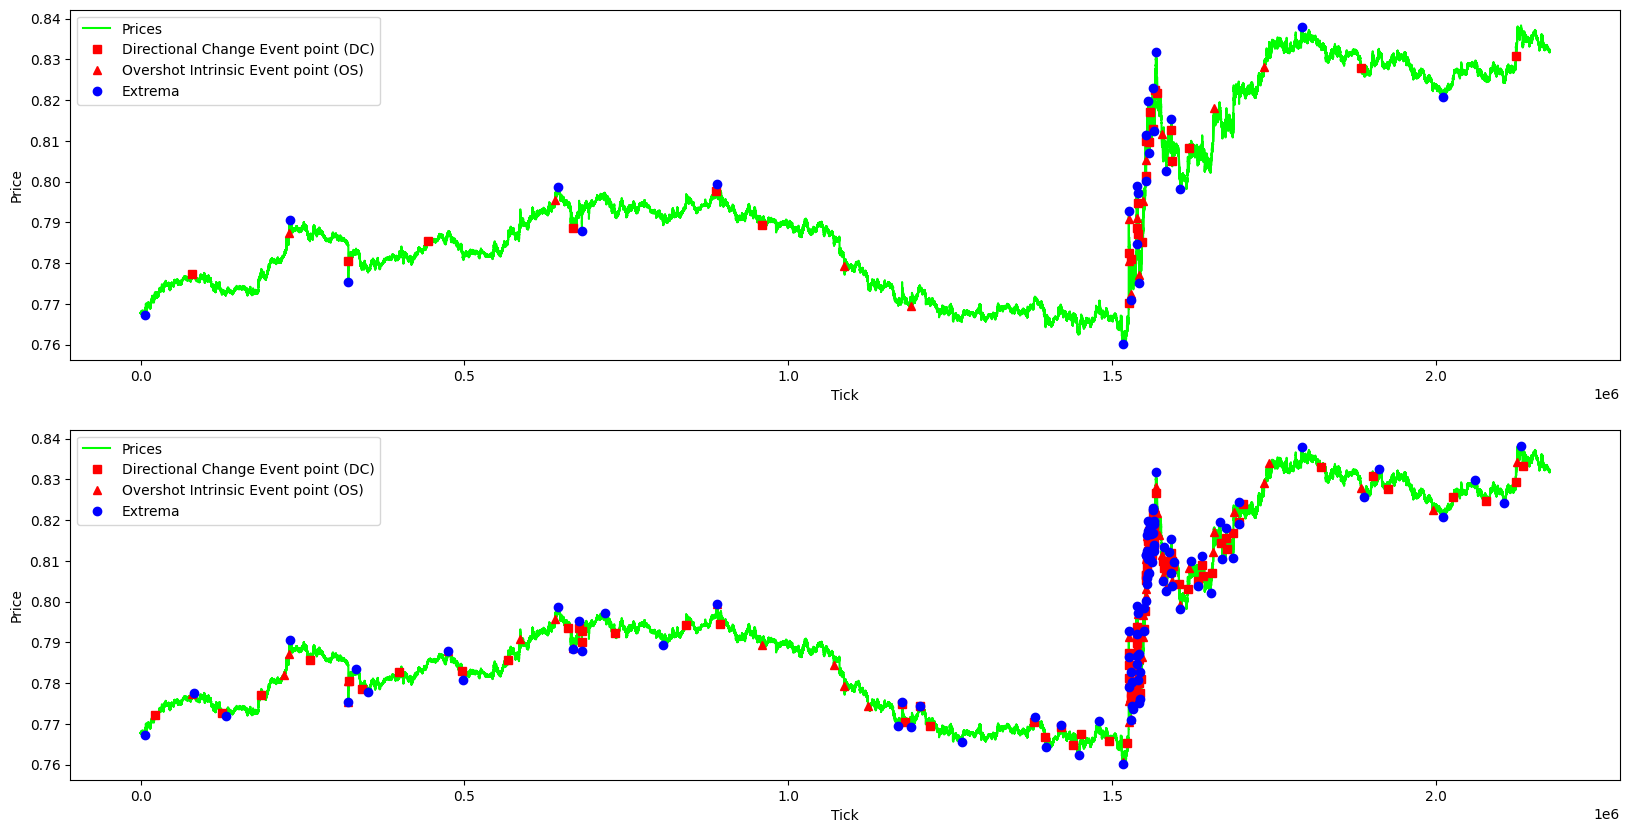

In [6]:
# Plotting
fig, axs = plt.subplots(2, figsize=(20, 10))

# First subplot with DA1 data
axs[0].set_xlabel("Tick") 
axs[0].set_ylabel("Price")
axs[0].plot(EURGBP_T_201606['ask'], 'lime', label="Prices")
axs[0].plot(DC1, 'rs', label="Directional Change Event point (DC)")
axs[0].plot(OS1, 'r^', label="Overshot Intrinsic Event point (OS)")
axs[0].plot(EX1, "bo", label="Extrema")
axs[0].plot(label="Thresholds: 0.01")
axs[0].legend()

# Second subplot with DA2 data
axs[1].set_xlabel("Tick") 
axs[1].set_ylabel("Price")
axs[1].plot(EURGBP_T_201606['ask'], 'lime', label="Prices")
axs[1].plot(DC2, 'rs', label="Directional Change Event point (DC)")
axs[1].plot(OS2, 'r^', label="Overshot Intrinsic Event point (OS)")
axs[1].plot(EX2, "bo", label="Extrema")
axs[1].legend()

plt.show()

>*From the graph, we can observe that the dissection algorithm is functioning correctly, with extremes occurring at the peaks and troughs of the varying price. Additionally, each directional change (DC) happens only after passing the extreme by the threshold I select upward and downward thresholds of (0.01, 0.01) and (0.005, 0.005) respectively to evaluate the algorithm. As depicted in the graphs, it is evident that the lower threshold of 0.005 results in a notably greater number of events compared to the higher threshold of 0.01. Thus, `the evidence demonstrates that smaller thresholds yield a higher frequency of events`*.

#### **Trading Strategy**

| Name                                                    | Notation                                          |
|---------------------------------------------------------|---------------------------------------------------|
| Threshold                                               | $θ$                                                 |
| Extreme point                                           | $EXT$                                               |
| Directional Change                                      | $DC$                                                |
| Upward Directional Change                               | $DC↑$                                               |
| Downward Directional Change                             | $DC↓$                                               |
| Directional Changes of threshold θ                        | $DC(θ)$, $DC↑(θ)$, $DC↓(θ)$                            |
| Current price                                           | $P_C$                                                |
| Price at extreme point                                  | $P_{EXT}$                                              |
| Price at upward Directional Change Confirmation point   | $P_{DCC↑} ≥ P_{EXT} × (1+ θ)$                            |
| Minimal price at upward Directional Change Confirmation point | $P_{DCC↑*} = P_{EXT} × (1+ θ) ≤ P_{DCC↑}$   |
| Highest price in the current trend                      | $P_{Hi}$                                               |
| Lowest price in the current trend                       | $P_{Lo}$                                               |
| Overshoot value |$OSV = ((P_C – P_{DCC*}) ÷ P_{ DCC*}) ÷ θ$|
| At $DC$ confirmation, $OSV=0$;
  At $P_C =P_{EXT} × (1+2θ)$ , $OSV = 1$; in general:
  At $P_C =P_{EXT} × (1+kθ)$, where $k>0$, $OSV = k-1$  
  At $P_C = P_{EXT} × (1-kθ)$, where $k>0$, $OSV = -k+1$ | 


##### **Strategy 1**
> *Firstly, I will utilise the trading strategy provided in Lab 8 of the High Frequency Finance Module [2].*
1. Open long position at $DC↑(θ)$ confirmation
2. (Take profit:) Close position at $P_{C}$ >= $P_{DCC↑}$ x $(1+θ/2)$
3. (Stop loss:) Close position at $P_{C}$ <= $P_{DCC↑}$ x $(1-θ/2)$

##### **Strategy 1 Pseudo Code**
---
1. **Initialize** `delta_up` to `Threshold`
2. **Initialize** `delta_down` to `Threshold`
3. **Initialize** `position` to "closed"
4. **Initialize** `PnL` to 0
5. **Initialize** `NumberofTrades` to 0
6. **Initialize** `P_DCC_up` to 0
7. **Perform** `DissectionAlgorithm(delta_up, delta_down, FX_df)` and store as `DA`
8. **Loop** over each index `i` in `range(len(FX_df))`:
    - a. Call `DA.dissect(i)`
    - b. Retrieve `P_c` as `FX_df["ask"][i]`
    - c. **If** `DA.events[i]` equals 1 **and** `position` equals "closed":
        - i. Set `position` = "open"
        - ii. Increment `NumberofTrades` by 1
        - iii. Set `P_DCC_up` = `P_c`
        - iv. Decrement `PnL` by `P_DCC_up`
    - d. **Else if** `P_c` >= `P_DCC_up` x (1 + `Threshold` / 2) **and** `position` equals "open":
        - i. Increment `PnL` by `P_c`
        - ii. Set `position` = "closed"
    - e. **Else if** `P_c` <= `P_DCC_up` x (1 - `Threshold` / 2) **and** `position` equals "open":
        - i. Increment `PnL` by `P_c`
        - ii. Set `position` = "closed"
9. **Return** `PnL`, `NumberofTrades`
---

In [76]:
def TradingStrategy1(Threshold,FX_df):
    delta_up = Threshold
    delta_down = Threshold
    position = "closed"
    PnL = 0
    NumberofTrades = 0
    P_DCC_up= 0
    DA = DissectionAlgorithm(delta_up,delta_down,FX_df)
    for i in range(len(FX_df)):
        DA.dissect(i)
        P_c = FX_df["ask"][i]
        if DA.events[i] == 1 and position == "closed":
            position = "open"
            NumberofTrades += 1
            P_DCC_up = P_c
            PnL -= P_DCC_up
        elif P_c >= P_DCC_up * (1+Threshold/2) and position == "open":
            PnL += P_c
            position = "closed"
        elif P_c <= P_DCC_up * (1-Threshold/2) and position == "open":
            PnL += P_c
            position = "closed"
    return PnL, NumberofTrades

#Threshold = 0.005
#PnL,NumberofTrades = TradingStrategy1(Threshold,EURGBP_T_201606)

#print("Total Profit and Loss: ",PnL)
#print("The number of trades: ",NumberofTrades)

In [76]:
def TradingStrategy1(Threshold, FX_df):
    # Initialize parameters and variables
    delta_up = Threshold
    delta_down = Threshold
    position = "closed"
    PnL = 0
    NumberofTrades = 0
    P_DCC_up = 0
    
    # Initialize DissectionAlgorithm instance
    DA = DissectionAlgorithm(delta_up, delta_down, FX_df)
    
    # Iterate over the dataset
    for i in range(len(FX_df)):
        # Perform dissection at index i
        DA.dissect(i)
        
        # Current price
        P_c = FX_df["ask"][i]
        
        # Entry condition: price breaches upward threshold and position is closed
        if DA.events[i] == 1 and position == "closed":
            position = "open"
            NumberofTrades += 1
            P_DCC_up = P_c
            PnL -= P_DCC_up  # Subtract from PnL as the position is opened
            
        # Exit conditions: price breaches upper or lower threshold and position is open
        elif P_c >= P_DCC_up * (1 + Threshold / 2) and position == "open":
            PnL += P_c  # Add to PnL as the position is closed
            position = "closed"
        elif P_c <= P_DCC_up * (1 - Threshold / 2) and position == "open":
            PnL += P_c  # Add to PnL as the position is closed
            position = "closed"
    
    # Return the final profit or loss and the number of trades
    return PnL, NumberofTrades

#Threshold = 0.005
#PnL,NumberofTrades = TradingStrategy1(Threshold,EURGBP_T_201606)

#print("Total Profit and Loss: ",PnL)
#print("The number of trades: ",NumberofTrades)

##### **Strategy 2** 
> *In Trading Strategy 2, we will build upon Trading Strategy 1 by incorporating the concept of Overshoot Value (OSV). This enhanced approach aids traders in better comprehending the extent of price movements beyond the expected directional change confirmation points, enabling them to adjust their trading decisions accordingly.*

1. Opening a Long Position:
   - Initiate a long position when an upward Directional Change Confirmation ($DC↑(θ)$) occurs at price $P_{DCC↑}$.

2. Taking Profit (Dynamically Adjusted with OSV):
   - Set the take profit level dynamically based on OSV. Endeavour to close the position when the current price $P_C$ reaches the level: $P_{DCC↑} × (1 + \max(θ/2, OSV × θ))$. This adjustment ensures that, should the price move briskly and OSV be significant, the take profit level adapts to capture potentially higher returns.

3. Setting a Stop Loss (Dynamically Adjusted with OSV):
   - Adjust the stop loss level dynamically with consideration to OSV. If OSV indicates a substantial overshoot beyond the usual expectation, adjust the stop loss to: $P_{DCC↑} × (1 - \max(θ/2, OSV × θ))$. This assists in managing risk effectively during volatile price movements.

4. Monitoring OSV:
   - Continuously monitor OSV values as long as the position remains open:
     - Calculate OSV using $OSV = ((P_C – P_{DCC↑}) / P_{DCC↑}) / θ$.
     - Use OSV to adapt take profit and stop loss levels whenever $P_C$ updates, to lock in profits or avert excessive loss in line with current market conditions.

5. Closing the Position:
   - Close the position either at the dynamically adjusted take profit or stop loss levels depending on market movement and the current calculation of OSV.

##### **Strategy 2 Pseudo Code**
---
1. **Initialize** `delta_up` to `Threshold`
2. **Initialize** `delta_down` to `Threshold`
3. **Initialize** `position` to "closed"
4. **Initialize** `PnL` to 0
5. **Initialize** `NumberofTrades` to 0
6. **Initialize** `P_DCC_up` to 0
7. **Initialize** `OSV` to 0
8. **Perform** `DissectionAlgorithm(delta_up, delta_down, FX_df)` and store as `DA`

9. **Loop** over each index `i` in `range(len(FX_df))`:
    - a. Call `DA.dissect(i)`
    - b. Retrieve `P_c` as `FX_df["ask"][i]`
    
    - c. **If** `DA.events[i]` equals 1 **and** `position` equals "closed":
        - i. Set `position` to "open"
        - ii. Increment `NumberofTrades` by 1
        - iii. Set `P_DCC_up` to `P_c`
        - iv. Reset `OSV` to 0
        - v. Decrement `PnL` by `P_c` (Open the position by buying at current price)
    
    - d. **If** `position` equals "open":
        - i. **Calculate** `OSV` using: $OSV = \left(\frac{{P_c - P_{DCC↑}}}{{P_{DCC↑}}}\right) / θ$
        
        - ii. **Calculate** the dynamic take profit level:
           - `take_profit_level` = `P_DCC_up` x (1 + max(`Threshold`/2, `OSV` x `Threshold`))
           
        - iii. **Calculate** the dynamic stop loss level:
           - `stop_loss_level` = `P_DCC_up` x (1 - max(`Threshold`/2, `OSV` x `Threshold`))
           
        - iv. **If** `P_c` >= `take_profit_level` or `P_c` <= `stop_loss_level`:
            - A. Increment `PnL` by `P_c` (Close the position by selling at current price)
            - B. Set `position` to "closed"
            
10. **Return** `PnL`, `NumberofTrades`
---

In [68]:
def TradingStrategy2(Threshold, FX_df):
    delta_up = Threshold
    delta_down = Threshold
    position = "closed"
    PnL = 0
    NumberofTrades = 0
    P_DCC_up = 0
    OSV = 0  # Initialize Overshoot Value
    DA = DissectionAlgorithm(delta_up, delta_down, FX_df)
    
    for i in range(len(FX_df)):
        DA.dissect(i)
        P_c = FX_df["ask"][i]
        
        if DA.events[i] == 1 and position == "closed":
            position = "open"
            NumberofTrades += 1
            P_DCC_up = P_c
            OSV = 0  # Reset OSV at the point of opening a position
            PnL -= P_c  # Open the position by buying at current price
        
        if position == "open":
            # Calculate the OSV everytime the price updates
            if P_c > P_DCC_up:
                OSV = ((P_c - P_DCC_up) / P_DCC_up) / Threshold
            
            # Dynamic Take Profit
            take_profit_level = P_DCC_up * (1 + max(Threshold/2, OSV * Threshold))
            # Dynamic Stop Loss
            stop_loss_level = P_DCC_up * (1 - max(Threshold/2, OSV * Threshold))
            
            if P_c >= take_profit_level:
                PnL += P_c  # Close the position by selling at current price
                position = "closed"
            elif P_c <= stop_loss_level:
                PnL += P_c  # Close the position by selling at current price
                position = "closed"
                
    return PnL, NumberofTrades

#Threshold = 0.005
#PnL, NumberofTrades = TradingStrategy2(Threshold, EURGBP_T_201606)

#print("Total Profit and Loss:", PnL)
#print("Number of Trades:", NumberofTrades)

<h2 style="color:navy;">Part II: Testing Your Strategy</h2>

In [77]:
# Read the EURGBP_T_201606 and EURUSD_T_201912 CSV files into pandas DataFrame for later use
URGBP_T_201606 = pd.read_csv("D:/桌面/DAT_ASCII_EURGBP_T_201606.csv",
names=['date', 'code', 'bid', 'ask', 'signal'], sep="\s+|,")
EURUSD_T_201912 = pd.read_csv("D:/桌面/DAT_ASCII_EURUSD_T_201912.csv",
names=['date', 'code', 'bid', 'ask', 'signal'], sep="\s+|,")
print(EURGBP_T_201606.head())
print(EURUSD_T_201912.head())

C:\Users\user\AppData\Local\Temp\ipykernel_22244\4140634563.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  EURGBP_T_201606 = pd.read_csv("D:/桌面/DAT_ASCII_EURGBP_T_201606.csv", names=['date', 'code', 'bid', 'ask', 'signal'], sep="\s+|,")
C:\Users\user\AppData\Local\Temp\ipykernel_22244\4140634563.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  EURUSD_T_201912 = pd.read_csv("D:/桌面/DAT_ASCII_EURUSD_T_201912.csv", names=['date', 'code', 'bid', 'ask', 'signal'], sep="\s+|,")


       date   code      bid      ask  signal
0  20160601   1687  0.76777  0.76784       0
1  20160601   3937  0.76777  0.76785       0
2  20160601   7937  0.76776  0.76784       0
3  20160601  20937  0.76778  0.76786       0
4  20160601  21687  0.76777  0.76785       0
       date       code      bid      ask  signal
0  20191201  170003296  1.10229  1.10247       0
1  20191201  170004413  1.10232  1.10247       0
2  20191201  170005270  1.10229  1.10247       0
3  20191201  170006063  1.10228  1.10246       0
4  20191201  170006629  1.10226  1.10244       0


In [71]:
# Define a list of thresholds to iterate over
Thresholds = [0.01, 0.005, 0.001]

# Iterate over each threshold value
for Threshold in Thresholds:

    # Execute TradingStrategy1 and TradingStrategy2 for EURGBP dataset
    PnL1_1,NumberofTrades1_1 = TradingStrategy1(Threshold,EURGBP_T_201606)
    PnL2_1,NumberofTrades2_1 = TradingStrategy2(Threshold,EURGBP_T_201606)
    
    # Execute TradingStrategy1 and TradingStrategy2 for EURUSD dataset
    PnL1_2,NumberofTrades1_2 = TradingStrategy1(Threshold,EURUSD_T_201912)
    PnL2_2,NumberofTrades2_2 = TradingStrategy2(Threshold,EURUSD_T_201912)

    # Print results for each dataset and strategy
    print("Threshold given by the trader is ", Threshold)
    print("-----------------------------------------")
    print("Dataset of Backtest: EURGBP")
    print("Total Profit and Loss of Strategy1: ",PnL1_1)
    print("The number of trades of Strategy1: ",NumberofTrades1_1)
    print("Total Profit and Loss of Strategy2: ",PnL2_1)
    print("The number of trades of Strategy2: ",NumberofTrades2_1)
    print("-----------------------------------------")
    print("Dataset of Backtest: EURUSD")
    print("Total Profit and Loss of Strategy1: ",PnL1_2)
    print("The number of trades of Strategy1: ",NumberofTrades1_2)
    print("Total Profit and Loss of Strategy2: ",PnL2_2)
    print("The number of trades of Strategy2: ",NumberofTrades2_2)
    print("-----------------------------------------")
    print()


Threshold given by the trader is  0.01
-----------------------------------------
Dataset of Backtest: EURGBP
Total Profit and Loss of Strategy1:  -0.020899999999999808
The number of trades of Strategy1:  13
Total Profit and Loss of Strategy2:  -0.020899999999999808
The number of trades of Strategy2:  13
-----------------------------------------
Dataset of Backtest: EURUSD
Total Profit and Loss of Strategy1:  0.005589999999999984
The number of trades of Strategy1:  1
Total Profit and Loss of Strategy2:  0.005589999999999984
The number of trades of Strategy2:  1
-----------------------------------------

Threshold given by the trader is  0.005
-----------------------------------------
Dataset of Backtest: EURGBP
Total Profit and Loss of Strategy1:  0.0012599999999999278
The number of trades of Strategy1:  50
Total Profit and Loss of Strategy2:  0.0019000000000000128
The number of trades of Strategy2:  50
-----------------------------------------
Dataset of Backtest: EURUSD
Total Profit a

####  **Empirical Results Discussion** 
> *The original intention was to integrate OSV into trading strategy 1. Through dynamically adjusting the flexibility of the strategy, it could effectively conduct adaptive risk management, thereby coping with sudden market movements or abnormal fluctuations. Alternatively, by utilizing rapid price movements that drive up OSV values, it captures profits that are usually unattainable at fixed profit levels, thus maximising potential returns.*
> 
> *Empirical results of applying two trading strategies (Strategy 1 and Strategy 2) to two datasets (EURGBP and EURUSD) underwent extensive analysis and strategy improvements at three different thresholds (0.01, 0.005, 0.001). The impact of threshold levels is significant: lower thresholds (0.001) result in more trades compared to higher thresholds (0.01), indicating that lower thresholds may trigger trades when price fluctuations are smaller, which may not be significant in a broader market context, potentially resulting in more frequent but smaller losses or gains. Conversely, higher thresholds tend to filter out smaller price changes, resulting in fewer but potentially more significant trades. Strategy comparison shows similar performance between Strategy 1 and Strategy 2 across different datasets and thresholds, but in some cases, Strategy 2 outperforms Strategy 1 or slightly underperforms, suggesting practical implementation beyond value theory needs improvement. Dataset responses highlight the role of market characteristics and currency behavior in the success of strategies. Finally, several strategy modifications are proposed based on empirical analysis insights, including threshold optimization, enhanced risk management, adjustments for specific market and currency characteristics, and refinement of the OSV indicator.*

<h2 style="color:navy;">Part III: Reference</h2>
[1] PETROV, Vladimir; GOLUB, Anton; OLSEN, Richard B. Agent-based model in directional-change intrinsic time. Available at SSRN 3240456, 2018.

[2] High-Frequency Finance Module Lab 8: Intrinsic time HFF – Lab #8. London: King's College London.